# Part I - WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
# Make a request for each of the cities and capture needed data for upcoming dataframe

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "imperial"
query_url = f'{base_url}appid={weather_api_key}&units={units}&q='

cities_found = []
response = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
x = 0

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    query = f'{query_url}{city}'
    city_response = requests.get(query).json()
    x = x + 1
    print(f'Processing Record {x} | {city}')
    
    try:
        response.append(city_response['name'])
        cities_found.append(city)
        lat.append(city_response['coord']['lat'])
        lng.append(city_response['coord']['lon'])
        max_temp.append(city_response['main']['temp_max'])
        humidity.append(city_response['main']['humidity'])
        cloudiness.append(city_response['clouds']['all'])
        wind_speed.append(city_response['wind']['speed'])
        country.append(city_response['sys']['country'])
        date.append(city_response['dt'])
        
    except:
        print('City not found. Skipping...')
        
print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | maniitsoq
Processing Record 2 | mako
Processing Record 3 | qingdao
Processing Record 4 | rikitea
Processing Record 5 | ilulissat
Processing Record 6 | unai
Processing Record 7 | norman wells
Processing Record 8 | albany
Processing Record 9 | basoko
Processing Record 10 | busselton
Processing Record 11 | nyurba
Processing Record 12 | pisco
Processing Record 13 | punta arenas
Processing Record 14 | ponta do sol
Processing Record 15 | paratinga
Processing Record 16 | vestmannaeyjar
Processing Record 17 | kutum
Processing Record 18 | mataura
Processing Record 19 | ribeira grande
Processing Record 20 | touros
Processing Record 21 | upernavik
Processing Record 22 | grand river south east
City not found. Skipping...
Processing Record 23 | dakar
Processing Record 24 | north decatur
Processing Record 25 | vaini
Processing Record 26 | port alfred
Processing Record 27 | kupang
Processing Record 28 | miyako
Processing Rec

# Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from weather data
weather_dict = {
    'City': cities_found,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,maniitsoq,65.42,-52.90,37.42,80,61,7.09,GL,1592427808
1,mako,46.22,20.48,64.00,96,100,10.18,HU,1592427808
2,qingdao,36.10,120.37,66.20,93,75,4.47,CN,1592427808
3,rikitea,-23.12,-134.97,75.45,79,23,15.46,PF,1592427204
4,ilulissat,69.22,-51.10,39.20,73,85,6.93,GL,1592427413
...,...,...,...,...,...,...,...,...,...
572,high rock,26.62,-78.28,84.20,74,40,11.41,BS,1592427865
573,isangel,-19.55,169.27,73.40,88,75,6.93,VU,1592427865
574,christchurch,-43.53,172.63,45.00,100,98,10.29,NZ,1592427865
575,vila,42.03,-8.16,60.01,87,27,6.93,PT,1592427865


In [5]:
# save weather_data data frame as csv file
weather_data.to_csv('output_data/weather_data.csv')

In [6]:
# read csv and show as data frame
weather_csv = pd.read_csv('output_data/weather_data.csv')
weather_csv.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,maniitsoq,65.42,-52.90,37.42,80,61,7.09,GL,1592427808
1,1,mako,46.22,20.48,64.00,96,100,10.18,HU,1592427808
2,2,qingdao,36.10,120.37,66.20,93,75,4.47,CN,1592427808
3,3,rikitea,-23.12,-134.97,75.45,79,23,15.46,PF,1592427204
4,4,ilulissat,69.22,-51.10,39.20,73,85,6.93,GL,1592427413


# Inspect the data and remove the cities where the humidity > 100%.

Skip this step if there are no cities that have humidity > 100%.

In [11]:
# find max value for Humidity column to see if any over 100
weather_csv.max()

Unnamed: 0           576
City              zlobin
Lat                78.22
Lng               179.32
Max Temp           102.4
Humidity             100
Cloudiness           100
Wind Speed         32.57
Date          1592427865
dtype: object

Max Humidity value in data frame is 100, so no need to remove cities.

# Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

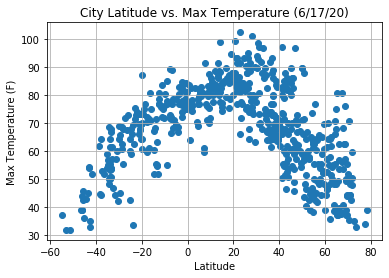

In [14]:
# build scatter plot
plt.scatter(weather_csv['Lat'], weather_csv['Max Temp'], marker='o')

# incorporate other graph properties
plt.title('City Latitude vs. Max Temperature (6/17/20)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Lat_Temp.png')

# show plot
plt.show()

This is creating a dot for each city based on latitude and max temp. You can see that the temps are higher closer to the equator.

# Latitude vs. Humidity Plot

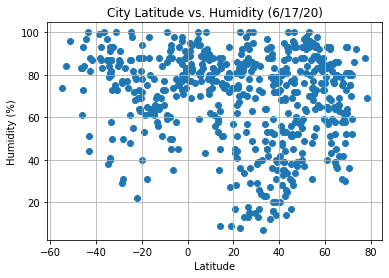

In [15]:
# build scatter plot
plt.scatter(weather_csv['Lat'], weather_csv['Humidity'], marker='o')

# incorporate other graph properties
plt.title('City Latitude vs. Humidity (6/17/20)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Lat_Hum.png')

# show plot
plt.show()

This is showing the marker for each city's respective latitude and humidity percentage. Don't see much of a correlation.

# Latitude vs. Cloudiness Plot

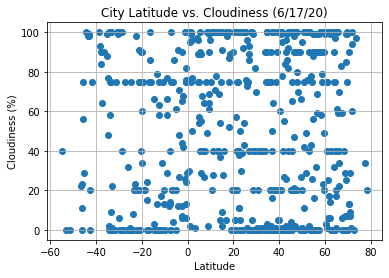

In [16]:
# build scatter plot
plt.scatter(weather_csv['Lat'], weather_csv['Cloudiness'], marker='o')

# incorporate other graph properties
plt.title('City Latitude vs. Cloudiness (6/17/20)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Lat_Cloud.png')

# show plot
plt.show()

This is showing a marker for each city's respective latitude and cloudiness. I do not see any kind of correlation.

# Latitude vs. Wind Speed Plot

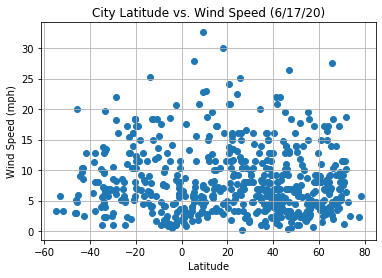

In [17]:
# build scatter plot
plt.scatter(weather_csv['Lat'], weather_csv['Wind Speed'], marker='o')

# incorporate other graph properties
plt.title('City Latitude vs. Wind Speed (6/17/20)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('output_data/Lat_Wind.png')

# show plot
plt.show()

This plot is showing each city's latitude and corresponding wind speed. I don't really see any kind of pattern.

In [ ]:
# Create Northern and Southern Hemisphere DataFrames